<a href="https://colab.research.google.com/github/SantiagoGil93/Proyecto_BootCamp/blob/main/Proyecto_Final_BootCamp_TalentoTech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de la Prevalencia de Enfermedades Mentales entre 1990 y 2019
Presentado por: Santiago Gil Bossa

## Indice
1. [Introducción](#introduccion)
2. [Inspección inicial de los datos](#inspeccion_inicial)
    - 2.1. [Importación de las librerias y de los DataFrames](#librerias)
    - 2.2. [Exploración del DataFrame de prevalencia por paises](#exploracion_paises)
    - 2.3. [Exploración del DataFrame de prevalencia por región](#exploracion_region)
3. [Análisis exploratorio de los datos](#eda)
    - 3.1. [Análisis exploratorio de la prevalencia por paises](#eda_paises)
        - 3.1.1 [Datos estadísticos](#estadisticos_paises)
        - 3.1.2 [Visualización de la distribución](#distribucion_paises)
        - 3.1.3 [Visualización de Boxplots](#boxplots_paises)  
        - 3.1.4 [Evolución temporal](#temporal_paises)
        - 3.1.5 [Mapa de color](#mapa_paises)
    - 3.2. [Análisis exploratorio de la prevalencia por region](#eda_region)
        - 3.2.1 [Datos estadísticos](#estadisticos_region)
        - 3.2.2 [Visualización de la distribución](#distribucion_region)
        - 3.2.3 [Visualización de Boxplots](#boxplots_region)  
        - 3.2.4 [Evolución temporal](#temporal_region)
4. [Análisis bivariado](#analisis_bivariado)
    - 4.1. [Análisis de correlación de los trastornos por paises](#correlacion_paises)
        - 4.1.1. [Valores de correlación entre el trastorno bipolar y los trastornos alimenticios](#correlacion_bipo_alim)
        - 4.1.2. [Gráfico de dispersión entre el trastorno bipolar y los trastornos alimenticios](#dispersion_bipo_alim)
        - 4.1.3. [Regresión lineal entre el trastorno bipolar y los trastornos alimenticios](#lineal_bipo_alim)
    - 4.2. [Análisis de correlación de los trastornos por regiones](#correlacion_region)        
        - 4.1.1. [Valores de correlación entre el trastorno bipolar y los trastornos de ansiedad](#correlacion_bipo_ansi)
        - 4.1.2. [Gráfico de dispersión entre el trastorno bipolar y los trastornos de ansiedad](#dispersion_bipo_ansi)
        - 4.1.3. [Regresión lineal entre el trastorno bipolar y los trastornos alimenticios](#lineal_bipo_ansi)
5. [Análisis de los datos de Colombia](#analisis_col)
    - 5.1 [Análisis exploratorio de los datos](#eda_col)
        - 5.1.1 [Datos estadísticos](#estadisticos_col)
        - 5.1.2. [Visualización de la distribución](#distribucion_col)
        - 5.1.3 [Visualización de Boxplots](#boxplots_col)
        - 5.1.4 [Evolución temporal](#temporal_col)
    - [5.2 Análisis Bivariado](#bivariado_col)
        - 5.2.1 [Análisis de correlación de los trastornos](#correlacion_col)
        - 5.2.2. [Valores de correlación entre los trastornos esquizofrénicos y los trastornos alimenticios](#val_correlacion_col)
        - 5.2.3. [Gráfico de dispersión entre el trastornos esquizofrénicos y los trastornos alimenticios](#dispercion_col)
        - 5.2.4. [Regresión lineal entre los trastornos esquizofrénicos y los trastornos alimenticios](#regresion_col)
6. [Maching learning](#maching_learning)
7. [Limitaciones](#limitaciones)
8. [Conclusiones](#conclusiones)


## 1. Introducción <a name="introduccion"></a>


La salud mental es un elemento clave que ha tomado una gran relevancia mundial tras la pandemia por el COVID-19, es por ello que en el presente proyecto, se realizará un análisis de un conjunto de datos que abarca la prevalencia de diversos trastornos mentales a nivel global. La prevalencia se muestra como una proporción de la población total, ajustados para tener en cuenta las diferencias en la estructura por edad y sexo de las poblaciones, lo que permite comparaciones más precisas entre diferentes paises o regiones. El análisis se realizará tanto a nivel mundial, como por regiones geográficas, además de un análisis para los datos de Colombia.

<br>Esta información ha sido extraida del dataset Mental Health disponible en la plataforma [Kaggle](https://www.kaggle.com/datasets/imtkaggleteam/mental-health/data) para uso publico.

## 2. Inspección Inicial de los datos
<a name="inspeccion_inicial"></a>

### 2.1. Importación de las librerias y de los DataFrames
<a name="librerias"></a>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df_country = pd.read_csv('https://raw.githubusercontent.com/SantiagoGil93/Proyecto_BootCamp/main/data/mental-illnesses-prevalence-countries.csv')
df_region = pd.read_csv('https://raw.githubusercontent.com/SantiagoGil93/Proyecto_BootCamp/main/data/mental-illnesses-prevalence-region.csv')

### 2.2. Exploración del DataFrame de prevalencia por paises
<a name="exploracion_paises"></a>

In [2]:
# Ver las primeras filas del DataFrame
df_country.head()

,Country,Code,Year,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815


In [3]:
# Información general sobre el DataFrame
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6150 entries, 0 to 6149
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  6150 non-null   object 
 1   Code                     6150 non-null   object 
 2   Year                     6150 non-null   int64  
 3   Schizophrenia disorders  6150 non-null   float64
 4   Depressive disorders     6150 non-null   float64
 5   Anxiety disorders        6150 non-null   float64
 6   Bipolar disorders        6150 non-null   float64
 7   Eating disorders         6150 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 384.5+ KB


In [4]:
# Revisamos los valores en la columna Country
df_country['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', '

In [5]:
# Revisamos los valores en la columna Year
df_country['Year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

Al revisar el DataFrame, observamos que los datos corresponden a la prevalencia de 5 trastornos mentales especificos, esquizofrenia, depresión, ansiedad, trastorno bipolar y trastornos alimenticios en todos los países del mundo. La tabla refleja información de 30 años, comprendidos entre 1990 y 2019.
No se presentan valores nulos y hay un total de 8 columnas y 6150 registros.

### 2.2. Exploración del DataFrame de prevalencia por región
<a name="exploracion_region"></a>

In [6]:
# Ver las primeras filas del DataFrame
df_region.head()

,Region,Year,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
0,Africa (IHME GBD),1990,0.219527,4.602806,3.696839,0.607027,0.111027
1,Africa (IHME GBD),1991,0.219559,4.598041,3.695416,0.607090,0.110425
2,Africa (IHME GBD),1992,0.219579,4.593013,3.693819,0.607127,0.109845
3,Africa (IHME GBD),1993,0.219583,4.588568,3.692097,0.607134,0.109305
4,Africa (IHME GBD),1994,0.219556,4.586263,3.690115,0.607082,0.108813


In [7]:
# Información general sobre el DataFrame
df_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Region                   270 non-null    object 
 1   Year                     270 non-null    int64  
 2   Schizophrenia disorders  270 non-null    float64
 3   Depressive disorders     270 non-null    float64
 4   Anxiety disorders        270 non-null    float64
 5   Bipolar disorders        270 non-null    float64
 6   Eating disorders         270 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 14.9+ KB


In [8]:
# Revisamos los valores en la columna Country
df_region['Region'].unique()

array(['Africa (IHME GBD)', 'America (IHME GBD)', 'Asia (IHME GBD)',
       'Europe (IHME GBD)', 'European Union (27)',
       'High-income countries', 'Low-income countries',
       'Lower-middle-income countries', 'Upper-middle-income countries'],
      dtype=object)

Al revisar el DataFrame, observamos que los datos corresponden a la prevalencia de 5 trastornos mentales, esquizofrenia, depresión, ansiedad, trastorno bipolar y trastornos alimenticios agrupados por distintas regiones del mundo. La tabla refleja información de 30 años, comprendidos entre 1990 y 2019. No se presentan valores nulos y hay un total de 7 columnas y 270 registros.

## 3. Análisis exploratorio de los datos
<a name="eda"></a>

### 3.1. Análisis exploratorio de de la prevalencia por paises
<a name="eda_paises"></a>

### 3.1.1 Datos estadísticos
<a name="estadisticos_paises"></a>


In [9]:
# Datos estadisticos
df_country.describe()

,Year,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
count,6150.000000,6150.000000,6150.000000,6150.000000,6150.000000,6150.000000
mean,2004.500000,0.266031,3.766168,4.098702,0.638366,0.194945
std,8.656145,0.039258,0.939617,1.060642,0.235506,0.139051
min,1990.000000,0.188416,1.522333,1.879996,0.181667,0.044780
25%,1997.000000,0.241982,3.063132,3.425237,0.521153,0.095748
50%,2004.500000,0.272983,3.642872,3.939547,0.579017,0.144325
75%,2012.000000,0.285912,4.369088,4.539975,0.853304,0.242860
max,2019.000000,0.462045,7.645899,8.624634,1.506730,1.031688


Se observa que la media de depresión y ansiedad (3.76 y 4.09 respectivamente)es muy superior al resto de trastornos(0.26, esquizofrenia, 0.63, bipolaridad y 0.19, trastornos alimenticios), y que en el caso de los 5 trastornos la desviación estandar es baja.


### 3.1.2. Visualización de la distribución
<a name="distribucion_paises"></a>



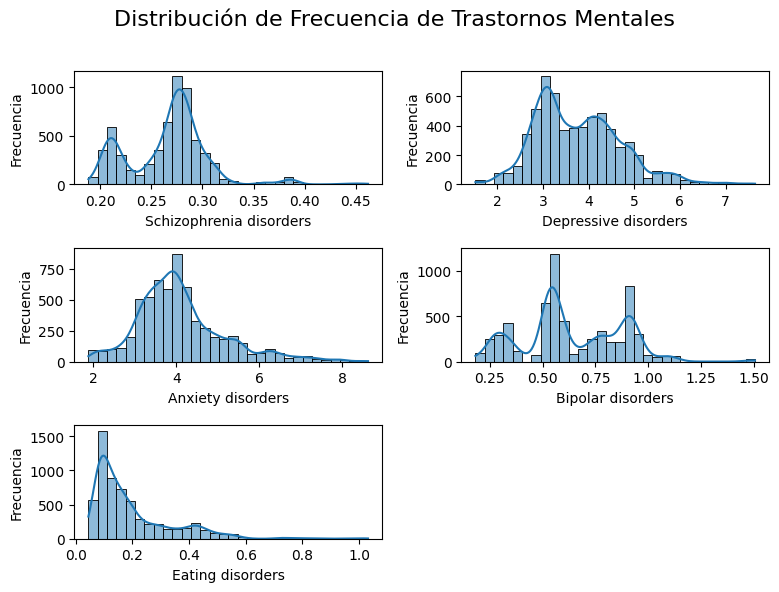

In [10]:
# Crear una figura y una cuadrícula de 3x2 para los gráficos
fig, axs = plt.subplots(3, 2, figsize=(8, 6))

# Bucle para crear histogramas
for i, column in enumerate(df_country.columns[3:8]):
    row = i // 2
    col = i % 2
    sns.histplot(df_country[column], kde=True, bins=30, ax=axs[row, col])
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Frecuencia')

# Añadir un título general a toda la figura
fig.suptitle('Distribución de Frecuencia de Trastornos Mentales', fontsize=16)
# Ajustar el layout para evitar solapamientos
plt.tight_layout(rect=[0, 0, 1, 0.96])
# Eliminar el subplot vacío
fig.delaxes(axs[2, 1])

plt.show()

*   El historgrama de esquizofrenia muestra uan tendencia hacia la izquierda con un leve pico, que puede sugerir que algunos paises presentan un valor constante en torno a una prevalencia de 0.20.
*   Tanto en el caso de la ansiedad como la depresión, las graficas muestran una tendencia a prevalencias entre 3 y 6, con algunos valos extremos.
*   En el caso de los trastornos alimenticios hay una distribución sesgada a la izquierda con valores atipicos, lo que podria deberse a fuertes variaciones sociales en algunos paises.

### 3.1.3 Visualización de Boxplots
<a name="boxplots_paises"></a>

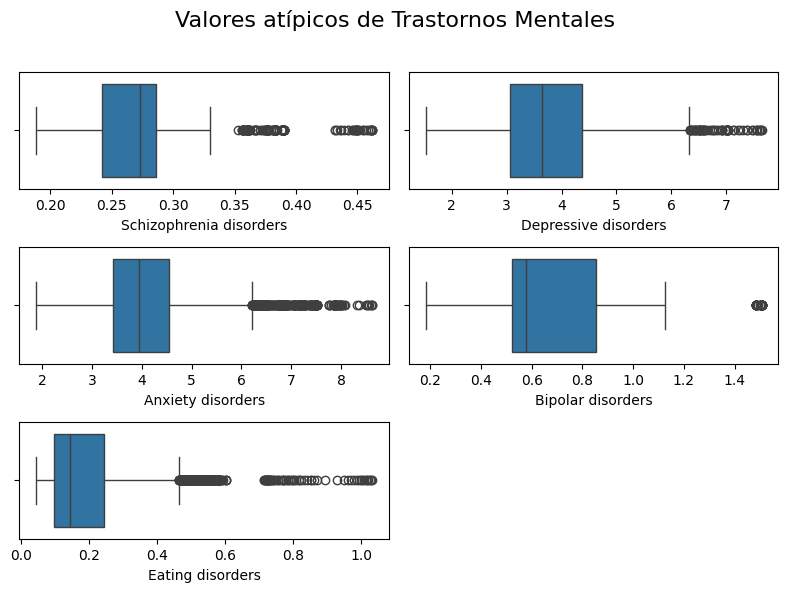

In [11]:
# Crear una figura y una cuadrícula de 3x2 para los gráficos
fig, axs = plt.subplots(3, 2, figsize=(8, 6))

# Bucle para crear boxplots
for i, column in enumerate(df_country.columns[3:8]):
    row = i // 2
    col = i % 2
    sns.boxplot(x=df_country[column], ax=axs[row, col])
    axs[row, col].set_xlabel(column)

# Añadir un título general a toda la figura
fig.suptitle('Valores atípicos de Trastornos Mentales', fontsize=16)
# Eliminar el subplot vacío
fig.delaxes(axs[2, 1])
# Ajustar el layout para evitar solapamientos
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

* Todos los trastornos mentales presentan numerosos valores atípicos, especialmente en el caso de los trastornos depresivos y de ansiedad, lo que sugiere una variabilidad significativa y la posible existencia de subgrupos con características distintas dentro de estos datos.
* La mediana en la mayoría de los boxplots no está centrada dentro de la caja, indicando distribuciones asimétricas. Esto es particularmente notable en los trastornos de ansiedad y alimenticios.

### 3.1.4 Evolución temporal
<a name="temporal_paises"></a>

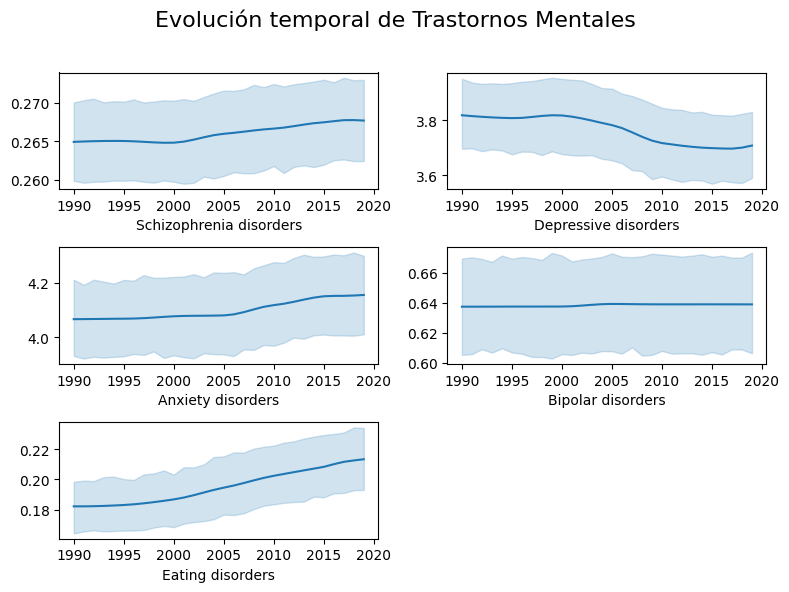

In [12]:
# Crear una figura y una cuadrícula de 3x2 para los gráficos
fig, axs = plt.subplots(3, 2, figsize=(8, 6))

# Bucle para crear lineplot
for i, column in enumerate(df_country.columns[3:8]):
    row = i // 2
    col = i % 2
    sns.lineplot(x='Year', y=column, data=df_country, ax=axs[row, col])
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel(None)

# Añadir un título general a toda la figura
fig.suptitle('Evolución temporal de Trastornos Mentales', fontsize=16)
# Eliminar el subplot vacío
fig.delaxes(axs[2, 1])
# Ajustar el layout para evitar solapamientos
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

* El trastorno bipolar muestra poca variación a lo largo de los 30 años, mantiendose con valores constantes.
*  Para el trastorno de ansiedad, los trastornos alimenticios y el trastorno esquizofrénico se muestra un aumento a lo largo de los años, siendo este aumento más marcado en el caso de los trastornos alimenticios.
* De manera llamativa, los trastornos depresivos muestran una tendencia a disminuir a diferencia del resto de trastornos, sin embargo , la variación de la prevalencia es poca, entre 3.8 y 3.6.

### 3.1.5 Mapa de color
<a name="mapa_paises"></a>

In [13]:


# Crear subplots con tres filas y dos columnas
fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=df_country.columns[3:8],
    specs=[
        [{"type": "choropleth"}, {"type": "choropleth"}],
        [{"type": "choropleth"}, {"type": "choropleth"}],
        [{"type": "choropleth"}, {"type": "choropleth"}]
    ],
    horizontal_spacing=0.05,  # Espacio horizontal entre los subplots
    vertical_spacing=0.05,    # Espacio vertical entre los subplots
    )

for i, column in enumerate(df_country.columns[3:8], start=1):
    # Calculamos la media historica de los trastornos depresivos por país
    mean = df_country.groupby('Country')[column].mean().reset_index()

    # Convertir el choropleth en un trace de go.Choropleth
    choropleth_trace = go.Choropleth(
        locations=mean['Country'],
        z=mean[column],
        locationmode='country names',
        colorscale='tempo',
        text=mean['Country'],
        hoverinfo='text+z',
        )

    # Determinar la fila y columna del subplot
    row = (i - 1) // 2 + 1
    col = (i - 1) % 2 + 1

    # Añadir el trace al subplot correspondiente
    fig.add_trace(choropleth_trace, row=row, col=col)

# Personalización del tamaño del mapa, márgenes y del título
fig.update_layout(
    width=1000,
    height=800,
    margin=dict(l=30, r=30, t=90, b=50),  # Ajuste del margen superior para evitar que el título se solape con los mapas de colores
    title=dict(text='<b>Mapa Coroplético de la Media Histórica de los Trastornos Mentales</b>', x=0.5, y=0.95, font=dict(size=20)),
    dragmode=False,
    )
# Personalización barra de color
fig.update_traces(selector=dict(type='choropleth'),
                  colorbar_title= "Incidencia",
                  colorbar_title_side="top",
                  colorbar_len=0.75,
                  colorbar_thickness=15,
                  colorbar_tickvals=[],
                  )
fig.show()

Teniendo en cuenta que cada mapa coroplético tiene una escala diferente, podemos observar que:
* En el trastorno esquizofrénico y bipolar la distribución geográfica es similar, con altas incidencias en América del Norte y Europa.
* Para el trastorno de ansiedad y depresión ambos trastornos muestran altas incidencias en América del Norte y Europa, pero los trastornos de ansiedad tienen una incidencia notablemente alta en el sur de África.
* Los trastornos alimenticios, a diferencia de otros trastornos, muestra una incidencia particularmente alta en Australia, junto con valores altos en America del Norte y Europa.

### 3.2. Análisis exploratorio de la prevalencia por región
<a name="eda_region"></a>

### 3.2.1 Datos estadísticos
<a name="estadisticos_region"></a>

In [14]:
# Datos estadisticos
df_region.describe()

,Year,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,2004.500000,0.279650,3.786794,4.173302,0.605131,0.212045
std,8.671515,0.040029,0.497999,0.784238,0.175907,0.121179
min,1990.000000,0.215477,3.085536,3.087365,0.323440,0.077584
25%,1997.000000,0.272388,3.537420,3.598294,0.422466,0.107808
50%,2004.500000,0.277526,3.629344,3.940182,0.606009,0.134228
75%,2012.000000,0.292238,3.997916,4.908868,0.738564,0.306726
max,2019.000000,0.345895,4.760519,5.919647,0.845058,0.416721


Al igual que el DF por paises, el trastorno de depresión y ansiedad (3.7 y 4.1) tienen una media mucho mayor al resto de trastornos (0.27-esquizofrenia, 0.60-bipolaridad y 0.21-trastornos alimenticios), Además la desviación estandar es baja para todos los trastornos.

### 3.2.2 Visualización de la distribución
<a name="distribucion_region"></a>

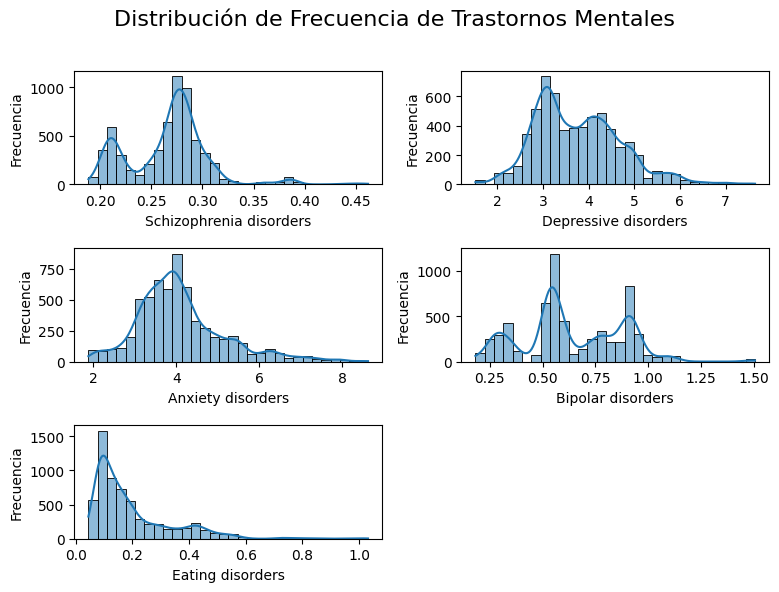

In [15]:
# Crear una figura y una cuadrícula de 3x2 para los gráficos
fig, axs = plt.subplots(3, 2, figsize=(8, 6))

# Bucle para crear histogramas
for i, column in enumerate(df_region.columns[2:7]):
    row = i // 2
    col = i % 2
    sns.histplot(df_country[column], kde=True, bins=30, ax=axs[row, col])
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Frecuencia')

# Añadir un título general a toda la figura
fig.suptitle('Distribución de Frecuencia de Trastornos Mentales', fontsize=16)
# Ajustar el layout para evitar solapamientos
plt.tight_layout(rect=[0, 0, 1, 0.96])
# Eliminar el subplot vacío
fig.delaxes(axs[2, 1])

plt.show()

*   Los datos reflejados en los histogramas muestran similitudes con los reflejados en los histogramas por países, indicando que las agrupaciones por regiones si reflejan la prevalencia esperada.

### 3.2.3 Visualización de Boxplots
<a name="boxplots_region"></a>


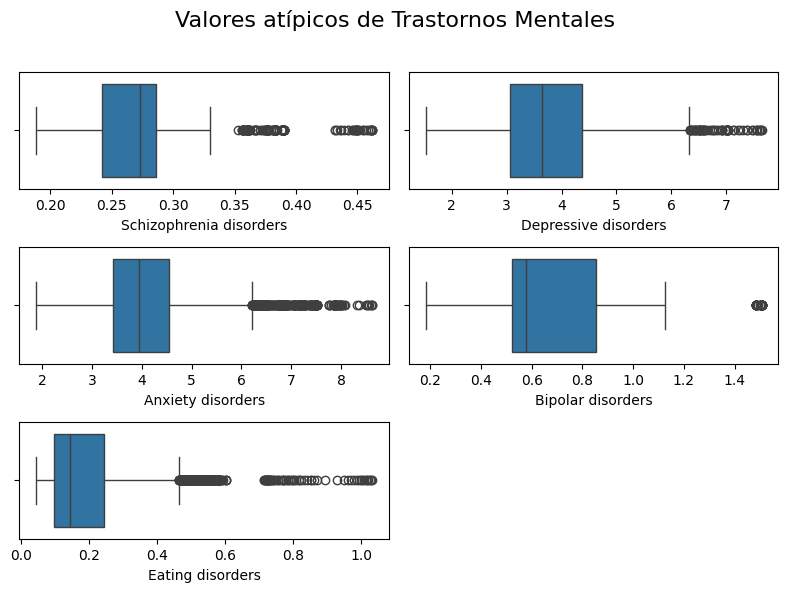

In [16]:
# Crear una figura y una cuadrícula de 3x2 para los gráficos
fig, axs = plt.subplots(3, 2, figsize=(8, 6))

# Bucle para crear boxplots
for i, column in enumerate(df_region.columns[2:7]):
    row = i // 2
    col = i % 2
    sns.boxplot(x=df_country[column], ax=axs[row, col])
    axs[row, col].set_xlabel(column)

# Añadir un título general a toda la figura
fig.suptitle('Valores atípicos de Trastornos Mentales', fontsize=16)
# Eliminar el subplot vacío
fig.delaxes(axs[2, 1])
# Ajustar el layout para evitar solapamientos
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

* Para el caso de la esquizofrenia se muestra una distribución con poca variabilidad en la tasa prevalencia en los distintos paises y años.
* En el caso de la depresión y la ansiedad la variabilidad es alta en comparación al resto de trastornos.

### 3.2.4 Evolución temporal
<a name="temporal_region"></a>

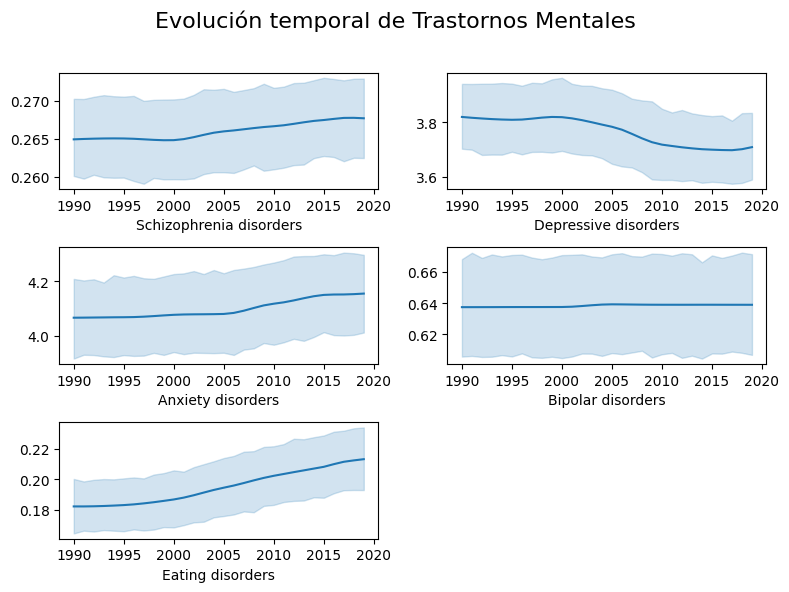

In [17]:
# Crear una figura y una cuadrícula de 3x2 para los gráficos
fig, axs = plt.subplots(3, 2, figsize=(8, 6))

# Bucle para crear lineplot
for i, column in enumerate(df_country.columns[3:8]):
    row = i // 2
    col = i % 2
    sns.lineplot(x='Year', y=column, data=df_country, ax=axs[row, col])
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel(None)

# Añadir un título general a toda la figura
fig.suptitle('Evolución temporal de Trastornos Mentales', fontsize=16)
# Eliminar el subplot vacío
fig.delaxes(axs[2, 1])
# Ajustar el layout para evitar solapamientos
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

* En general todos los trastornos muestran que la tasa de prevalencia tiene una estabilidad con algunas variaciones en momentos concretos, los cuales se podrian deber a distintos elementos socioculturales.

## 4. Análisis bivariado
<a name="analisis_bivariado"></a>

### 4.1. Análisis de correlación de los trastornos por paises
<a name="correlacion_paises"></a>

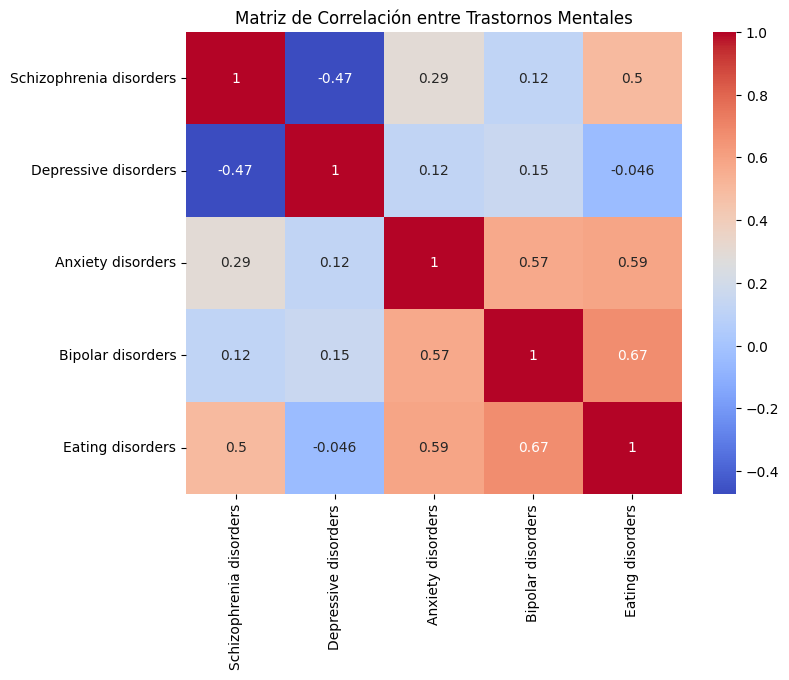

In [18]:
# Matriz de correlación
correlation_matrix = df_country[df_country.columns[3:]].corr()

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación entre Trastornos Mentales')
plt.show()

* Si bien ningún trastorno muestra una correlación alta con otro trastorno, los valores en torno a 0.5 muestran una leve correlación que puede explicarse por las características propias de cada enfermedad.
* La correlación negativa entre esquizofrenia y depresión, y en general los valores bajos de la correlación con los otros trastornos, muestran que por las características propias de esta enfermedad, es poco probable su aparición en prescencia de otros, a excepción de los trastornos alimenticios, que presentan una correlación de 0.5.

### 4.1.1. Valores de correlación entre el trastorno bipolar y los trastornos alimenticios
<a name="correlacion_bipo_alim"></a>





In [19]:
# Correlación
correlation = df_country['Eating disorders'].corr(df_country['Bipolar disorders'])
print("Correlación de Pearson:", correlation)
# Otras medidas de correlación
correlation_spearman = df_country['Eating disorders'].corr(df_country['Bipolar disorders'], method='spearman')
correlation_kendall = df_country['Eating disorders'].corr(df_country['Bipolar disorders'], method='kendall')
print("Correlación de Spearman:", correlation_spearman)
print("Correlación de Kendall:", correlation_kendall)

Correlación de Pearson: 0.6749670096522544
Correlación de Spearman: 0.7367843850189748
Correlación de Kendall: 0.5131661837667716


* Los coeficientes de Pearson, Spearman y Kendall están todos en el mismo rango positivo, pero los coeficientes de Spearman y Kendall son más altos que el de Pearson. Esto puede sugerir que la relación entre las variables es más fuerte en términos de orden (monotonicidad) que en términos de una relación lineal estricta.

### 4.1.2. Gráfico de dispersión entre el trastorno bipolar y los trastornos alimenticios
<a name="dispersion_bipo_alim"></a>


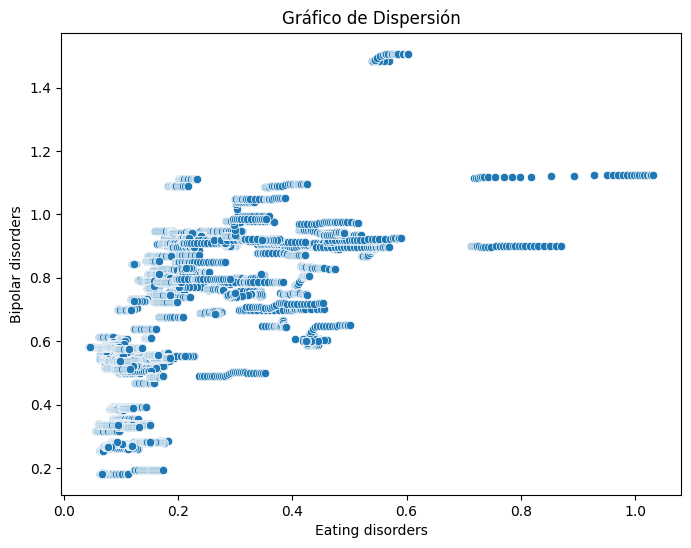

In [20]:
# Gráfico de Dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Eating disorders', y='Bipolar disorders', data=df_country)
plt.title('Gráfico de Dispersión')
plt.xlabel('Eating disorders')
plt.ylabel('Bipolar disorders')
plt.show()

* El gráfico de dispersión muestra una relación positiva moderadamente fuerte entre las dos variables, lo cual está respaldado por la correlación de Pearson de 0.675.

### 4.1.3. Regresión lineal entre el trastorno bipolar y los trastornos alimenticios
<a name="lineal_bipo_alim"></a>

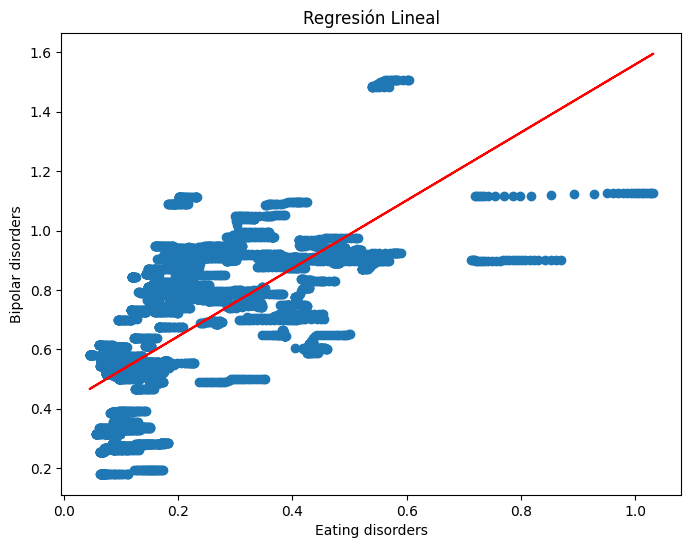

In [21]:
# Regresión Lineal
model = LinearRegression()
X = df_country[['Eating disorders']]
y = df_country['Bipolar disorders']
model.fit(X, y)

plt.figure(figsize=(8, 6))
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.title('Regresión Lineal')
plt.xlabel('Eating disorders')
plt.ylabel('Bipolar disorders')
plt.show()

* El encontrar valores tan alejados de la línea, muestran que si bien hay una correlación entre los datos, esta no es fuerte.

### 4.2. Análisis de correlación de los trastornos por regiones
<a name="correlacion_region"></a>

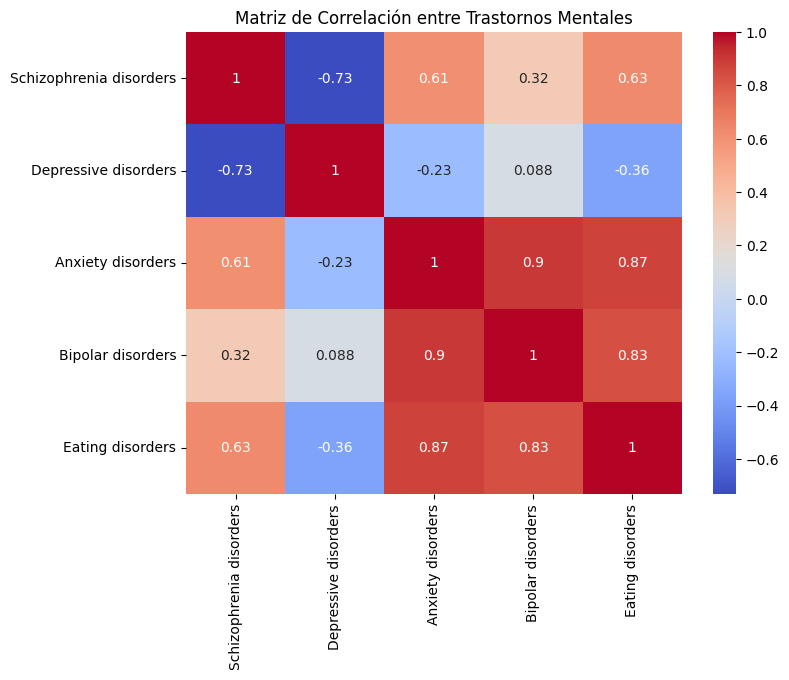

In [22]:
# Matriz de correlación
correlation_matrix = df_region[df_region.columns[2:]].corr()

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación entre Trastornos Mentales')
plt.show()

* A diferencia de los valores obtenidos en la correlación por paises, al realizar una correlación por regiones, los trastornos muestran valores mucho más altos, expecialmente entre el trastorno bipolar con el resto de trastornos, a excepción de con el trastorno esquizofrénico.
* El trastorno esquizofrénico muestra igualmente valores bajos con el resto de trastornos, siendo coherente con los resultados por paises.

### 4.1.1. Valores de correlación entre el trastorno bipolar y los trastornos de ansiedad por regiones
<a name="correlacion_bipo_ansi"></a>

In [23]:
# Correlación
correlation = df_region['Anxiety disorders'].corr(df_region['Bipolar disorders'])
print("Correlación de Pearson:", correlation)
# Otras medidas de correlación
correlation_spearman = df_region['Anxiety disorders'].corr(df_region['Bipolar disorders'], method='spearman')
correlation_kendall = df_region['Anxiety disorders'].corr(df_region['Bipolar disorders'], method='kendall')
print("Correlación de Spearman:", correlation_spearman)
print("Correlación de Kendall:", correlation_kendall)

Correlación de Pearson: 0.9021873338593046
Correlación de Spearman: 0.9206591768519914
Correlación de Kendall: 0.7477626325209968


* Los altos valores de las tres correlaciones indican que la relación positiva entre las variables es consistente y robusta, independientemente del método de correlación utilizado. Pearson refleja la relación lineal, mientras que Spearman y Kendall refuerzan que esta relación se mantiene firme al considerar los rangos y el orden de los datos.

### 4.1.2. Gráfico de dispersión entre el trastorno bipolar y los trastornos de ansiedad por regiones
<a name = 'dispersion_bipo_ansi'></a>

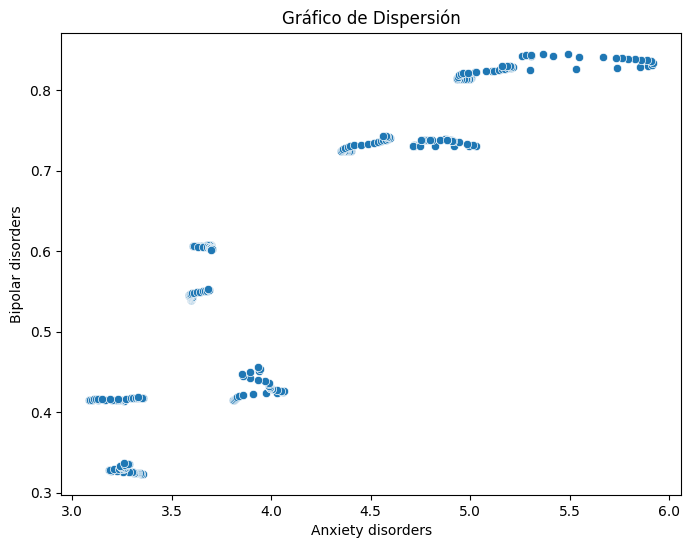

In [24]:
# Gráfico de Dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Anxiety disorders', y='Bipolar disorders', data=df_region)
plt.title('Gráfico de Dispersión')
plt.xlabel('Anxiety disorders')
plt.ylabel('Bipolar disorders')
plt.show()


El gráfico de dispersión revela una relación positiva extremadamente fuerte entre las dos variables, como lo evidencia la alta correlación de Pearson de 0.902. Este valor indica que los datos están fuertemente alineados a lo largo de una línea ascendente, sugiriendo que a medida que una variable aumenta, la otra también lo hace de manera muy consistente.

### 4.1.3. Regresión lineal entre el trastorno bipolar y los trastornos de ansiedad por regiones
<a name='lineal_bipo_ansi'></a>

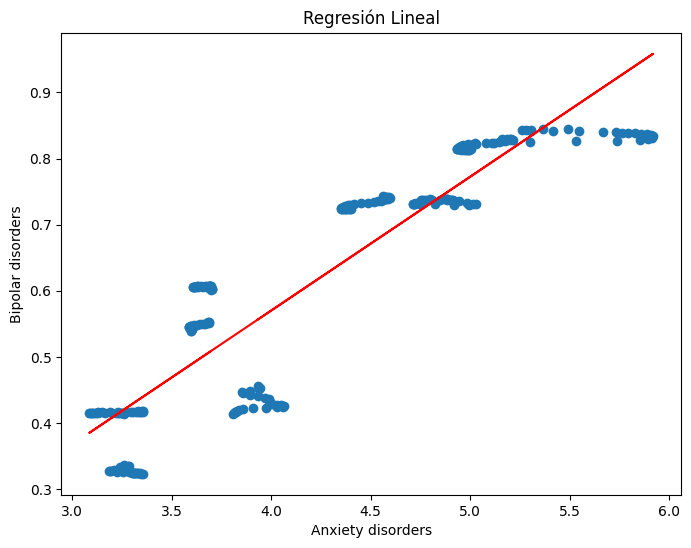

In [25]:
# Regresión Lineal
model = LinearRegression()
X = df_region[['Anxiety disorders']]
y = df_region['Bipolar disorders']
model.fit(X, y)

plt.figure(figsize=(8, 6))
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.title('Regresión Lineal')
plt.xlabel('Anxiety disorders')
plt.ylabel('Bipolar disorders')
plt.show()


* La alta correlación de Pearson sugiere que los modelos lineales pueden ser muy efectivos para predecir una variable en función de la otra, debido a la fuerte relación lineal observada.

## 5. Análisis de los datos de Colombia
<a name='analisis_col'></a>

In [26]:
# Generación del DF con la información de Colombia
df_colombia = df_country[df_country['Country'] == 'Colombia']
df_colombia.head()

,Country,Code,Year,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
1140,Colombia,COL,1990,0.276140,2.414381,4.605985,0.741402,0.180932
1141,Colombia,COL,1991,0.276163,2.421881,4.601091,0.741457,0.181686
1142,Colombia,COL,1992,0.276179,2.430166,4.600316,0.741508,0.183083
1143,Colombia,COL,1993,0.276191,2.437867,4.602611,0.741557,0.184044
1144,Colombia,COL,1994,0.276198,2.448470,4.607154,0.741608,0.184719


Para realizar el análisis específico de los datos colombianos, se extraen estos en un dataframe diferente, para evitar alterar el original.

### 5.1 Análisis exploratorio de los datos
<a name='eda_col'></a>

### 5.1.1 Datos estadísticos
<a name="estadisticos_col"></a>

In [27]:
# Datos estadisticos
df_colombia.describe()

,Year,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2004.500000,0.277546,2.403446,4.660421,0.740993,0.195175
std,8.803408,0.001821,0.161479,0.444395,0.000613,0.012253
min,1990.000000,0.276041,2.169340,3.997010,0.739862,0.180932
25%,1997.250000,0.276159,2.221787,4.375151,0.740445,0.186805
50%,2004.500000,0.276199,2.434016,4.646936,0.741192,0.188818
75%,2011.750000,0.279059,2.556898,5.091174,0.741547,0.203363
max,2019.000000,0.281452,2.606664,5.254393,0.741664,0.220843


* A lo largo de los 30 años, los datos muestran una desviación estandar baja indicando poca variabilidad.

### 5.1.2. Visualización de la distribución
<a name='distribucion_col'></a>

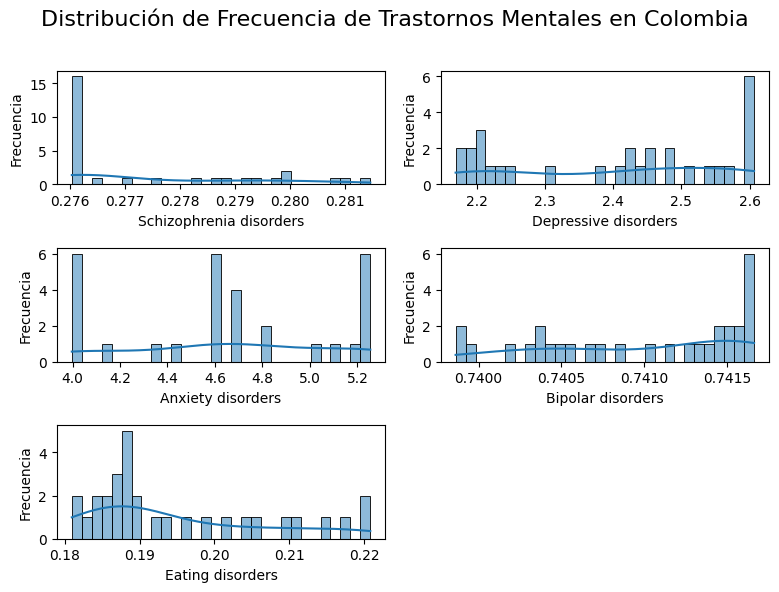

In [28]:
# Crear una figura y una cuadrícula de 3x2 para los gráficos
fig, axs = plt.subplots(3, 2, figsize=(8, 6))

# Bucle para crear histogramas
for i, column in enumerate(df_colombia.columns[3:8]):
    row = i // 2
    col = i % 2
    sns.histplot(df_colombia[column], kde=True, bins=30, ax=axs[row, col])
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Frecuencia')

# Añadir un título general a toda la figura
fig.suptitle('Distribución de Frecuencia de Trastornos Mentales en Colombia', fontsize=16)
# Ajustar el layout para evitar solapamientos
plt.tight_layout(rect=[0, 0, 1, 0.96])
# Eliminar el subplot vacío
fig.delaxes(axs[2, 1])

plt.show()

* Los histogramas muestran una tendencia baja, sin embargo se presentan valores atipicos altos. principalmente en esquizofrenia y depresión.

### 5.1.3 Visualización de Boxplots
<a name='boxplots_col'></a>

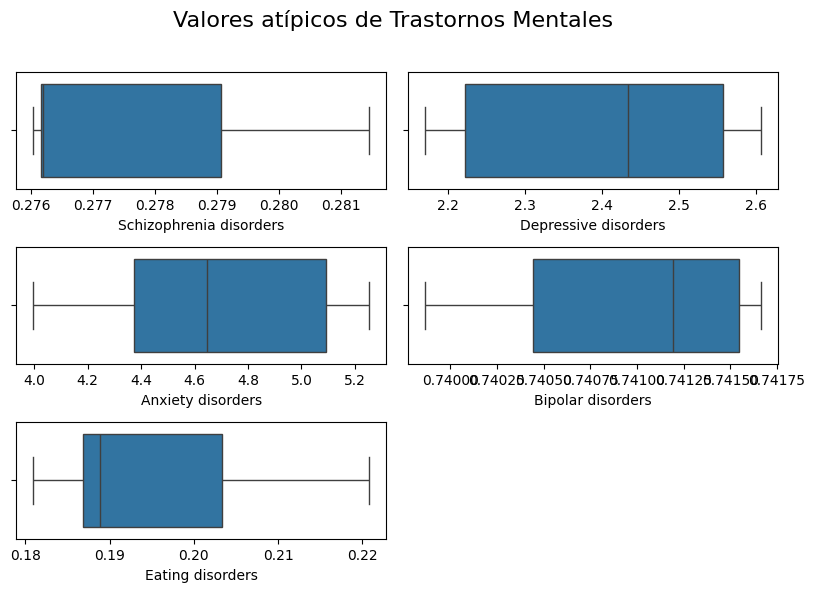

In [29]:
# Crear una figura y una cuadrícula de 3x2 para los gráficos
fig, axs = plt.subplots(3, 2, figsize=(8, 6))

# Bucle para crear boxplots
for i, column in enumerate(df_colombia.columns[3:8]):
    row = i // 2
    col = i % 2
    sns.boxplot(x=df_colombia[column], ax=axs[row, col])
    axs[row, col].set_xlabel(column)

# Añadir un título general a toda la figura
fig.suptitle('Valores atípicos de Trastornos Mentales', fontsize=16)
# Eliminar el subplot vacío
fig.delaxes(axs[2, 1])
# Ajustar el layout para evitar solapamientos
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

* En general los boxplots muestran que la mayor parte de los datos se encuentran agrupados, aún con la precencia de valores atípicos a ambos extremos.

### 5.1.4 Evolución temporal
<a name='temporal_col'></a>

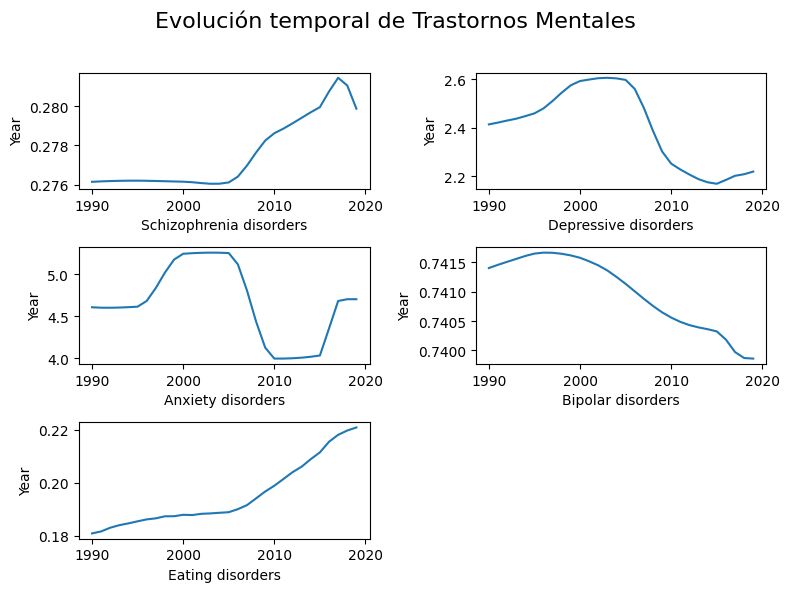

In [30]:
# Crear una figura y una cuadrícula de 3x2 para los gráficos
fig, axs = plt.subplots(3, 2, figsize=(8, 6))

# Bucle para crear lineplot
for i, column in enumerate(df_colombia.columns[3:8]):
    row = i // 2
    col = i % 2
    sns.lineplot(x='Year', y=column, data=df_colombia, ax=axs[row, col])
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Year')

# Añadir un título general a toda la figura
fig.suptitle('Evolución temporal de Trastornos Mentales', fontsize=16)
# Eliminar el subplot vacío
fig.delaxes(axs[2, 1])
# Ajustar el layout para evitar solapamientos
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

* El trastorno alimenticio, es el unico que muestra una clara tendencia de aumentar con el largo de los años, pasando de una incidencia de 0.18 a 0.22.
* El trastorno de ansiedad muestra una gran variación en el tiempo, principalmente entre los años 2000 y 2010.


### 5.2 Análisis Bivariado
<a name='bivariado_col'></a>

### 5.2.1 Análisis de correlación de los trastornos en Colombia
<a name='correlacion_col'></a>

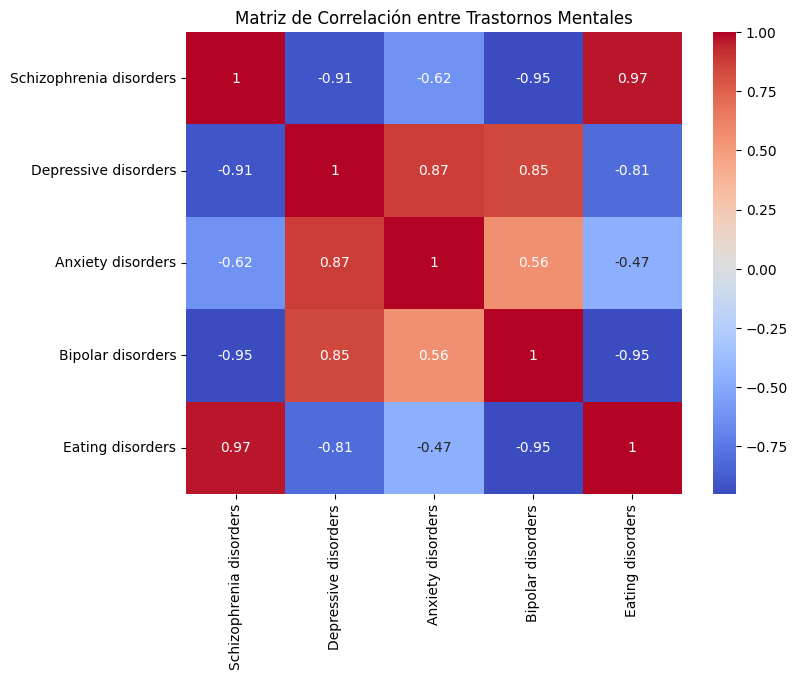

In [31]:
# Matriz de correlación
correlation_matrix = df_colombia[df_colombia.columns[3:]].corr()

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación entre Trastornos Mentales')
plt.show()

* A diferencia del análisis por países, al observar las correlaciones entre los trastornos en Colombia, se observan valores altos, entre los trastornos de ansiedad, depresión y bipolar
* Los trastornos de esquizofrenia y alimenticios comparten una fuerte correlación entre ellos, pero negativa con el resto.
* Si bien, estos valores son altos pueden ser el resultado de pocos datos.

### 5.2.2. Valores de correlación entre el trastorno esquizofrénico y los trastornos alimenticios
<a name='val_correlacion_col'></a>

In [32]:
# Correlación
correlation = df_colombia['Eating disorders'].corr(df_colombia['Schizophrenia disorders'])
print("Correlación de Pearson:", correlation)
# Otras medidas de correlación
correlation_spearman = df_colombia['Eating disorders'].corr(df_colombia['Schizophrenia disorders'], method='spearman')
correlation_kendall = df_colombia['Eating disorders'].corr(df_colombia['Schizophrenia disorders'], method='kendall')
print("Correlación de Spearman:", correlation_spearman)
print("Correlación de Kendall:", correlation_kendall)


Correlación de Pearson: 0.9684927489813185
Correlación de Spearman: 0.7432703003337041
Correlación de Kendall: 0.5678160919540229


* La disparidad entre la altísima correlación de Pearson y las correlaciones de Spearman y Kendall sugiere que, aunque la relación entre las variables es extremadamente fuerte de manera lineal, puede haber pequeñas variaciones o no-linealidades que afectan la relación cuando se considera el orden y la clasificación de los datos.

### 5.2.3. Gráfico de dispersión entre el trastorno esquizofrénico y los trastornos alimenticios
<a name='dispercion_col'>

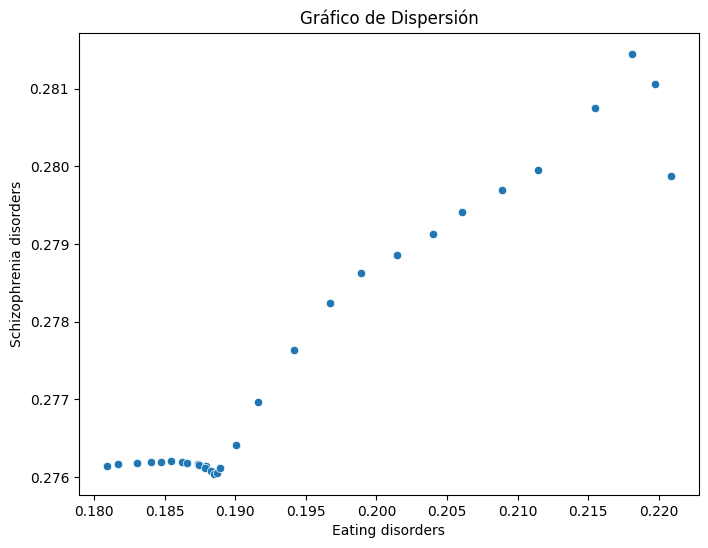

In [33]:
# Gráfico de Dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Eating disorders', y='Schizophrenia disorders', data=df_colombia)
plt.title('Gráfico de Dispersión')
plt.xlabel('Eating disorders')
plt.ylabel('Schizophrenia disorders')
plt.show()

### 5.2.4. Regresión lineal entre los trastorno esquizofrénicos y los trastornos alimenticios
<a name='regresion_col'></a>

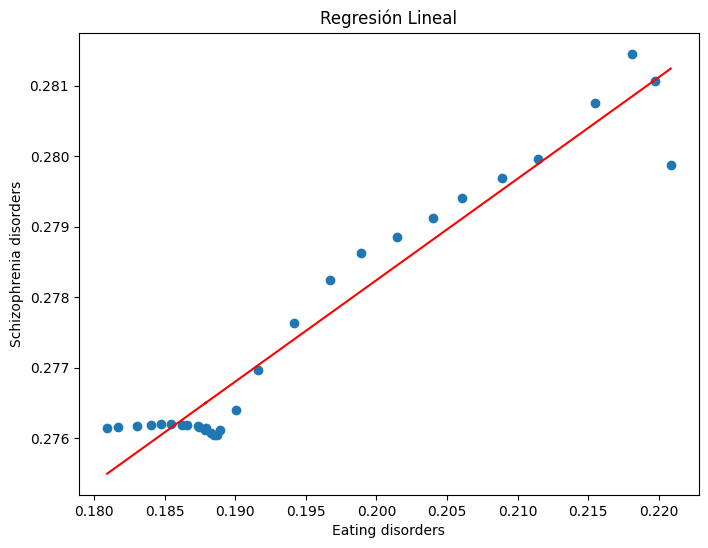

In [34]:
# Regresión Lineal
model = LinearRegression()
X = df_colombia[['Eating disorders']]
y = df_colombia['Schizophrenia disorders']
model.fit(X, y)

plt.figure(figsize=(8, 6))
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.title('Regresión Lineal')
plt.xlabel('Eating disorders')
plt.ylabel('Schizophrenia disorders')
plt.show()

* El gráfico de dispersión junto con la línea de regresión lineal muestra una relación lineal muy fuerte y positiva entre las dos variables, con un coeficiente de correlación de Pearson de 0.968. Esto indica que, a medida que una variable aumenta, la otra también lo hace de manera muy consistente y casi proporcional.

## 6. Maching learning
<a name='maching_learning'></a>

Ya que se presentaron varios valores de correlación entre las variables, se decide intentar predecir los valores que podría tener un país para un año futuro utilizando maching learning.

In [42]:
# Creamos una copia del DF orignal y elimamos la columna Code
df_model = df_country.copy()
df_model = df_model.drop(columns=['Code'])
df_model.head()

,Country,Year,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
0,Afghanistan,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,1994,0.220183,4.977782,4.670810,0.699898,0.111815


In [47]:


# Asegurarse de que la columna 'Year' sea de tipo entero
df_model['Year'] = df_model['Year'].astype(int)

# Realizar one-hot encoding en la columna 'Country'
df_encoded = pd.get_dummies(df_model, columns=['Country'])

# Separar las características (X) de las variables objetivo (y)
X = df_encoded.drop(columns=['Schizophrenia disorders', 'Depressive disorders', 'Anxiety disorders', 'Bipolar disorders', 'Eating disorders'])
y = df_encoded[['Schizophrenia disorders', 'Depressive disorders', 'Anxiety disorders', 'Bipolar disorders', 'Eating disorders']]

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar un modelo de regresión lineal para cada variable objetivo
models = {}
for column in y_train.columns:
    model = LinearRegression()
    model.fit(X_train, y_train[column])
    models[column] = model

# Evaluar el modelo en el conjunto de prueba
mse_results = {}
for column in y_test.columns:
    y_pred = models[column].predict(X_test)
    mse = mean_squared_error(y_test[column], y_pred)
    mse_results[column] = mse
    print(f'MSE for {column}: {mse}')

# Función para hacer predicciones para un país y año específicos
def predict_for_year(country, year):
    # Crear un DataFrame con los valores necesarios para la predicción
    input_data = {
        'Year': [year],
        **{col: [1 if col == f'Country_{country}' else 0] for col in df_encoded.columns if col.startswith('Country_')}
    }
    input_df = pd.DataFrame(input_data)

    # Asegurarse de que todas las columnas estén presentes
    for col in X.columns:
        if col not in input_df.columns:
            input_df[col] = 0

    # Reordenar las columnas para que coincidan con X
    input_df = input_df[X.columns]

    # Realizar la predicción
    predictions = {column: models[column].predict(input_df)[0] for column in y.columns}
    return predictions

# Ejemplo de predicción para Estados Unidos en 2020
country = 'United States'
year = 2020
future_predictions = predict_for_year(country, year)
print(f"Predicción para {country} en el año {year}:")
print(f'{future_predictions}')
print("_____")

# Ejemplo de predicción para Colombia en 2020
country = 'Colombia'
year = 2020
future_predictions = predict_for_year(country, year)
print(f"Predicción para {country} en el año {year}:")
print(f'{future_predictions}')
print("_____")


MSE for Schizophrenia disorders: 8.69195369054799e-06
MSE for Depressive disorders: 0.017904227653554247
MSE for Anxiety disorders: 0.0186067703044456
MSE for Bipolar disorders: 1.9163306098292078e-05
MSE for Eating disorders: 0.0002464340160288525
Predicción para United States en el año 2020:
{'Schizophrenia disorders': 0.45037385006874237, 'Depressive disorders': 4.252654271335219, 'Anxiety disorders': 5.712909673636852, 'Bipolar disorders': 0.6047433988740516, 'Eating disorders': 0.46151961803443387}
_____
Predicción para Colombia en el año 2020:
{'Schizophrenia disorders': 0.2793967132940167, 'Depressive disorders': 2.3234820145093025, 'Anxiety disorders': 4.736276296600294, 'Bipolar disorders': 0.7420266296959478, 'Eating disorders': 0.214294411756617}
_____


* Los valores de error cuadrático (MSE) son bajos, y esto puede indicar que el modelo de regresión lineal se ajusta de manera variada a los diferentes trastornos mentales. La precisión del ajuste es más alta para los trastornos de esquizofrenia y bipolar, donde los MSE son extremadamente bajos, indicando predicciones muy precisas. Los trastornos depresivos y de ansiedad tienen MSE más altos, sugiriendo que el modelo tiene un poco más de error en sus predicciones para estos trastornos. Para los trastornos alimentarios, el modelo también proporciona un buen ajuste, aunque no tan preciso como para la esquizofrenia y el bipolar.
* Si bien los valores resultantes podrian considerarse confiables, hay que tener en cuenta que las predicciones se pueden deber a un sesgo o un sobreajuste del modelo por alguna característica de los datos, es por ello que podria usarse probar este modelo con otros datos o asegurar la confiabilidad de los datos.

## 7. Limitaciones
<a name='limitaciones'></a>

* Al no tener una MetaData de los datos originales extraidos de Kaggle, no se tiene claro la forma en que los datos se obtuvieron por lo que si bien permiten tener una idea general del comportamiento de la tasa de prevalencia a lo largo de los años, se debe de usar esta información con cuidado y verificar con otras fuentes de información.
* Al estar los datos estandarizados tanto por edad como por sexo, se pierden elementos de análisis que podrían ser considerados en el análisis, y que permitan explicar a mayor profundidad el comportamiento de los datos.
* Al estar los datos limitados hasta el 2019, no se percibe el impacto que la pandemia por el COVID-19 tuvo en la salud mental, por lo que para futuros análisis podria ser util observar los datos de estos mismos trastornos durante y tras la pandemia en comparación con los años anteriores.

## 8. Conclusiones
<a name='conclusiones'></a>

El análisis de los datos sobre trastornos mentales a nivel global proporciona una comprensión profunda de la prevalencia y distribución de varios trastornos en diferentes países y a lo largo del tiempo. A partir de los resultados obtenidos, se pueden destacar las siguientes conclusiones clave:

* La prevalencia de trastornos mentales varía significativamente entre diferentes países y regiones. Esto sugiere la influencia de factores culturales, económicos y sociales en la incidencia de estos trastornos.
* Los trastonos esquizofrénicos muestran poca variación a nivel mundial durante el transcurso de los 30 años, lo cual puede deberse a un fuerte componente biológico en la aparición de esto trastornos.
* Tanto para los trastornos depresivos como los trastornos de ansiedad, presentan una tasa de prevalencia muy superior frente al resto de trastornos, lo cual podría servir como guía para promover políticas públicas de salud mental.
* El trastorno bipolar si bien no muestra una tendencia en aumento, o una región donde sea superior, y su incidencia en el tiempo es constante, presenta mayores tasas de incidencia que los trastonors esquizofrénicos y alimenticios.
* El aumento progresivo de la incidencia para los trastornos alimenticios, muestran una alerta principalmente en los paises de norteamerica, europa y Australia.
* Las distintas correlaciones obtenidas al realizar los análisis, dan cuenta de que existen relación entre las características propias de los trastornos, por lo que es necesario entrar a revisar posibles efectos cuando estos se presenten de manera simultanea en una misma persona.
* En el caso colombiano, las tasas de prevalencia se muestran constantes y con gran correlación entre estos, si bien esta correlación se puede deber a problemas con la muestra, es importante propulsar políticas públicas de salud mental.
* El modelo realizado con maching learning presenta resultados relativamente confiables, pero que deberian ser estudiados a profundidad, ya que la oportunidad de lograr predecir la tasa de prevalencia de un país puede ser clave en el área de salud.

